# **QUESTION1**

Output Volume after Conv1: (128, 128, 16)
Output Volume after MaxPool1: {(64, 64, 16)}


In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow

In [2]:
dataset = 'D:/MSc/SEMESTER 3/DL/Data'

In [29]:
directories = {
    'D:/MSc/SEMESTER 3/DL/MY_data/train/Apple' : 0,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/avocado': 1,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/Banana': 2,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/cherry': 3,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/kiwi': 4,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/mango': 5,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/orange': 6,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/pinenapple': 7,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/strawberries': 8,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/watermelon': 9
}


In [54]:
def preprocess_images(directory, size=(100, 100)):
    images = []
    labels = []
    for subdir, label in directory.items():
        files = os.listdir(subdir)
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path)
            if img is not None:  

                img = cv2.resize(img, size)  
                
                img = img.astype('float32') / 255.0  
                
                images.append(img)
                labels.append(label)
            
            else:
                print(f"Failed to read image: {img_path}")
    
    return np.array(images), np.array(labels)

images, labels = preprocess_images(directories)


Failed to read image: D:/MSc/SEMESTER 3/DL/MY_data/train/orange\img_2731.jpeg


In [31]:

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [32]:
# Print the shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (1610, 100, 100, 3)
Validation set shape: (483, 100, 100, 3)
Test set shape: (207, 100, 100, 3)
Training labels shape: (1610,)
Validation labels shape: (483,)
Test labels shape: (207,)


# ***CNN Architecture***

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential()

# Convolutional layer 1 with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with Batch Normalization
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with Batch Normalization
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(10, activation='softmax'))

model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,539,018 (36.39 MB)

 Trainable params: 9,537,546 (36.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [35]:
from keras.utils import to_categorical

# Assuming you have four classes, you can specify the number of classes
num_classes = 10

# One-hot encode the labels for training set
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)




In [36]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=10, validation_data=(X_val, y_val_encoded))


Epoch 1/10
38/51 ━━━━━━━━━━━━━━━━━━━━ 10s 820ms/step - accuracy: 0.2913 - loss: 2.4384

51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 917ms/step - accuracy: 0.3103 - loss: 2.3243 - val_accuracy: 0.1636 - val_loss: 2.5149
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 819ms/step - accuracy: 0.5634 - loss: 1.2517 - val_accuracy: 0.1263 - val_loss: 2.7131
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 821ms/step - accuracy: 0.6746 - loss: 0.9599 - val_accuracy: 0.0994 - val_loss: 3.1404
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 918ms/step - accuracy: 0.8010 - loss: 0.6116 - val_accuracy: 0.1387 - val_loss: 3.2405
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 875ms/step - accuracy: 0.8480 - loss: 0.4690 - val_accuracy: 0.1698 - val_loss: 2.8631
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 834ms/step - accuracy: 0.9050 - loss: 0.2963 - val_accuracy: 0.1718 - val_loss: 2.9913
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 43s 847ms/step - accuracy: 0.9271 - loss: 0.2324 - val_accuracy: 0.2795 - val_loss: 2.4475
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 48s 942ms/step - accuracy: 0.9678 - loss: 0.1374 - val_accuracy: 0.341

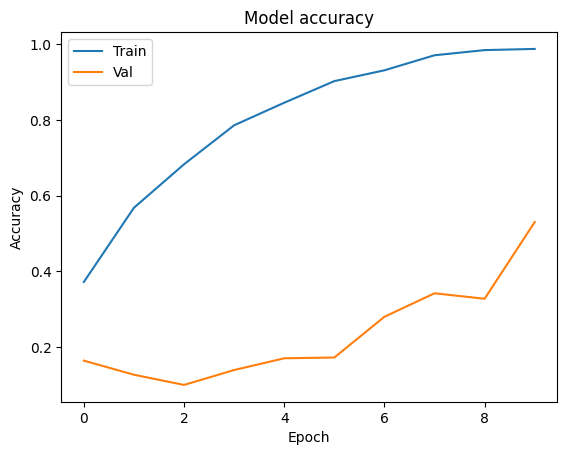

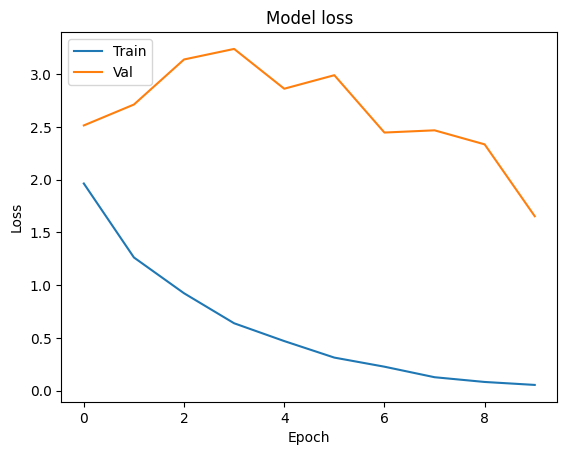

In [37]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


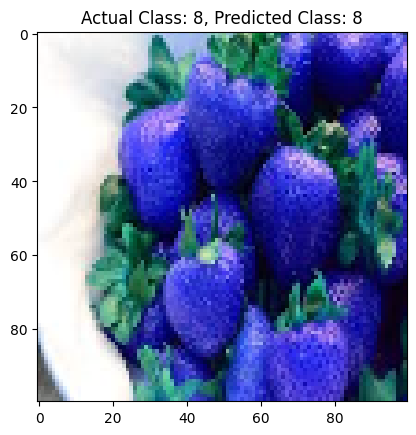

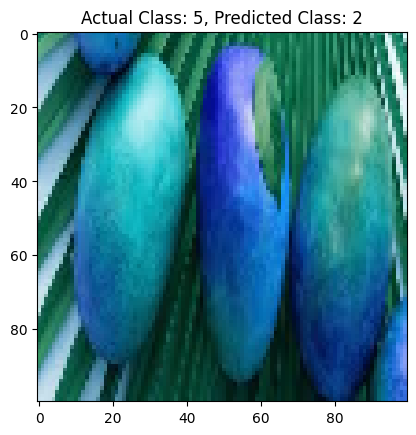

In [55]:
random_indices = np.random.choice(len(X_test), 2, replace=False)

random_images = X_test[random_indices]
random_labels = y_test[random_indices]

predictions = model.predict(random_images)

for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in vgg16_base.layers:
    layer.trainable = False


model1 = Sequential()


model1.add(vgg16_base)

model1.add(Flatten())


model1.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.5)) 

# Output layer
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [42]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history1 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.7839 - loss: 4.1308 - val_accuracy: 0.6615 - val_loss: 3.4476
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.8945 - loss: 2.5984 - val_accuracy: 0.6646 - val_loss: 2.7195
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.9098 - loss: 1.9357 - val_accuracy: 0.7360 - val_loss: 2.0729
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.9359 - loss: 1.5316 - val_accuracy: 0.6366 - val_loss: 2.1432
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9121 - loss: 1.4479 - val_accuracy: 0.7236 - val_loss: 1.8738
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9255 - loss: 1.3452 - val_accuracy: 0.6553 - val_loss: 2.0569
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 185s 5s/step - accuracy: 0.9227 - loss: 1.2851 - val_accuracy: 0.7019 - val_loss: 1.8976
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.9331 - loss: 1.2081 - val_accuracy: 0.6894 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


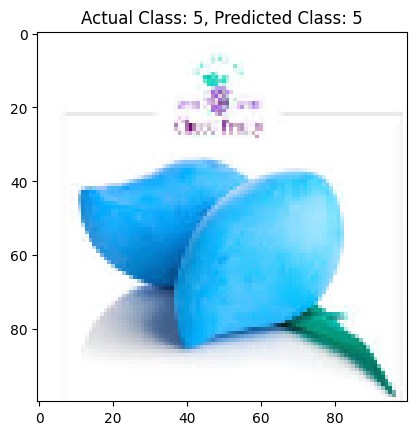

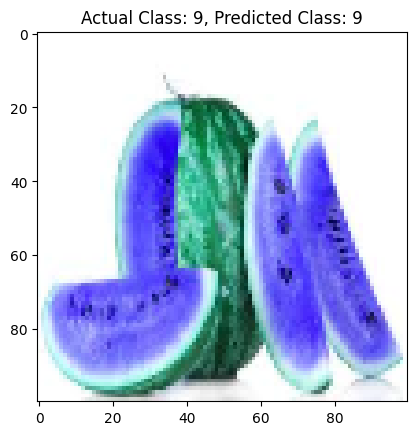

In [43]:
random_indices = np.random.choice(len(X_train), 2, replace=False)

# Selecting corresponding images and labels
random_images = X_train[random_indices]
random_labels = y_train[random_indices]

# Predicting classes
predictions = model.predict(random_images)

# Displaying images with predicted and actual labels
for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

In [44]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model without the top layers (include_top=False)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the ResNet50 layers so they are not trainable
for layer in resnet_base.layers:
    layer.trainable = False

# Create a new Sequential model
resnet_model = Sequential()

# Add the ResNet50 base model
resnet_model.add(resnet_base)

# Flatten the output of the ResNet50 base model
resnet_model.add(Flatten())

# Fully connected layers with Dropout and L2 regularization
resnet_model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5)) 

# Output layer
resnet_model.add(Dense(10, activation='softmax'))

resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [46]:
# Compile the model
resnet_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_resnet = resnet_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.2201 - loss: 3.5732 - val_accuracy: 0.1335 - val_loss: 7.6411
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3194 - loss: 2.9239 - val_accuracy: 0.1118 - val_loss: 7.0345
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.3357 - loss: 2.7094 - val_accuracy: 0.1708 - val_loss: 5.5977
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.3363 - loss: 2.7958 - val_accuracy: 0.1677 - val_loss: 7.8726
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.3263 - loss: 2.7536 - val_accuracy: 0.1180 - val_loss: 5.5950
Epoch 6/10
28/41 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3569 - loss: 2.6933

KeyboardInterrupt: 